# Task Asigment

This notebook contains a exercise of Mathematic Programming taken from the course "INTRODUCCIÓN A LA PROGRAMACIÓN MATEMÁTICA" from the UNED.

# Statement

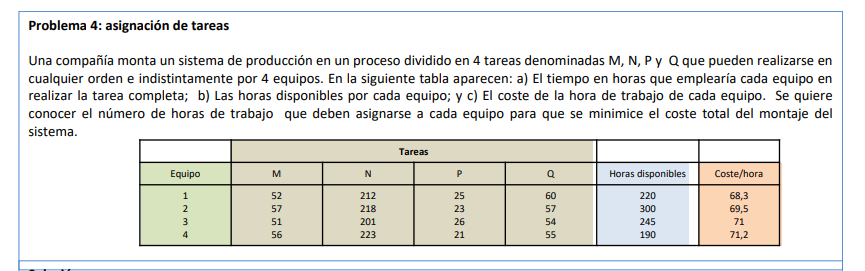

# Step 1: Define the decision variables

The decision variables of this problem are hours of each team dedicated to each task. But since the tasks cannot be left half done, the decision variables that are going to be chosen are the number of each of the tasks that each team do. Given 
$Teams = \{team_{1}, team_{3}, team_{3}, team_{4}, team_{n}\}$ 
and 
$Tasks = \{task_{1}, task_{2}, task_{3}, task_{4}, task_{n}\}$
. The decision variables are: 
- $H = \{h_{team_{1},task_{1}}, h_{team_{1},task_{2}}, ..., h_{team_{1},task_{m}}, h_{team_{2},task_{1}}, h_{team_{2},task_{2}}, ..., h_{team_{2},task_{m}}, ... h_{team_{n},task_{m}}\}$

In [1]:
class Team(object):
    """
    Team data structure that holds an identifier, the number of hours available of the team and the cost per hour of the team
    """
    def __init__(self, team_id, hours_available, cost_per_hour):
        self.team_id         = team_id
        self.hours_available = hours_available
        self.cost_per_hour   = cost_per_hour
        
        
class Task(object):
    """
    Task data structure that holds an identifier and the number of hours that each team has to invest to complete the task
    """
    def __init__(self, task_id, hours_by_team):
        self.task_id = task_id
        self.hours_by_team = hours_by_team
        

In [2]:
from mip import *

teams = [Team("1", 220, 68.3), Team("2", 300, 69.5), Team("3", 245, 71), Team("4", 190, 71.2)]

tasks = [Task("M", [{'team_id': team.team_id, 'cost': cost} for team, cost in zip(teams, [52, 57,51, 56])]),
         Task("N", [{'team_id': team.team_id, 'cost': cost} for team, cost in zip(teams, [212, 218, 201, 223])]),
         Task("P", [{'team_id': team.team_id, 'cost': cost} for team, cost in zip(teams, [25, 23,26, 21])]),
         Task("Q", [{'team_id': team.team_id, 'cost': cost} for team, cost in zip(teams, [60, 57,54, 55])])]

tasks[0].hours_by_team


m = Model(sense=MAXIMIZE, solver_name=CBC)
m.threads = -1 # Use all cores Available

for team in teams:
    for task in tasks:
        m.add_var(f"hoursDedicated_{team.team_id}{task.task_id}", var_type=CONTINUOUS, lb=0)
        
decision_variables = np.array(m.vars).reshape(((len(teams), len(tasks))))


# Step 2: Define the restrictions
The restrictions in this problem are the following:
- $\sum \limits _{i=1} ^{Tasks} h_{team_{n},task_{i}} * cost_{team_{n},task_{i}}  \le horasDisponibles_{n}$
- $\sum \limits _{i=1} ^{Tasks} \frac{h_{n_{team_{i},task_{n}}}} {cost_{team_{i},{task_{n}}}} = 1$

In [3]:
for decision_variable_row, index in zip(decision_variables, range(len(teams))):
    restriction = xsum(decision_variable_row) <= teams[index].hours_available
    m.add_constr(restriction, name=f'Team {index} maxHours restriction')
    print(restriction)
decision_variables_T = decision_variables.T
for decision_variable_row, index in zip(decision_variables_T, range(len(teams))):
    costs_of_team = [team_cost['cost'] for team_cost in tasks[index].hours_by_team]
    restriction = (xsum(decision_variable_row / costs_of_team)) == 1.0
    m.add_constr(restriction, name=f'Task {tasks[index].task_id} completely done')
    print(restriction)


+ hoursDedicated_1M + hoursDedicated_1N + hoursDedicated_1P + hoursDedicated_1Q  <= 220.0
+ hoursDedicated_2M + hoursDedicated_2N + hoursDedicated_2P + hoursDedicated_2Q  <= 300.0
+ hoursDedicated_3M + hoursDedicated_3N + hoursDedicated_3P + hoursDedicated_3Q  <= 245.0
+ hoursDedicated_4M + hoursDedicated_4N + hoursDedicated_4P + hoursDedicated_4Q  <= 190.0
+ 0.019230769230769232hoursDedicated_1M + 0.017543859649122806hoursDedicated_2M + 0.0196078431372549hoursDedicated_3M + 0.017857142857142856hoursDedicated_4M  = 1.0
+ 0.0047169811320754715hoursDedicated_1N + 0.0045871559633027525hoursDedicated_2N + 0.004975124378109453hoursDedicated_3N + 0.004484304932735426hoursDedicated_4N  = 1.0
+ 0.04hoursDedicated_1P + 0.043478260869565216hoursDedicated_2P + 0.038461538461538464hoursDedicated_3P + 0.047619047619047616hoursDedicated_4P  = 1.0
+ 0.016666666666666666hoursDedicated_1Q + 0.017543859649122806hoursDedicated_2Q + 0.018518518518518517hoursDedicated_3Q + 0.01818181818181818hoursDedicated

# Step 3: Define the Objective Function
In this exercise what needs to be optimize is the cost of carrying out the tasks. Therefore the objective function is the following:

$minimize(\sum \limits _{Teams} ^{i=1} (\sum \limits _{Task} ^{j=1} h_{team ̣{i},task ̣{j}}) * costPerHour_{team_{i}})$

In [4]:
aux = [xsum(decision_variable_row) for decision_variable_row in decision_variables]
costs_per_hour = [team.cost_per_hour for team in teams]
import numpy as np
objective_function = xsum(np.multiply(aux, costs_per_hour))
print(objective_function)
m.objective = minimize(objective_function)

+ 68.3hoursDedicated_1M + 68.3hoursDedicated_1N + 68.3hoursDedicated_1P + 68.3hoursDedicated_1Q + 69.5hoursDedicated_2M + 69.5hoursDedicated_2N + 69.5hoursDedicated_2P + 69.5hoursDedicated_2Q + 71.0hoursDedicated_3M + 71.0hoursDedicated_3N + 71.0hoursDedicated_3P + 71.0hoursDedicated_3Q + 71.2hoursDedicated_4M + 71.2hoursDedicated_4N + 71.2hoursDedicated_4P + 71.2hoursDedicated_4Q 


# Step 4: Ejecutar el optimizador y analizar resultados

The decision variables are shown along their optimal values using a DataFrame from Pandas.

In [5]:
status = m.optimize()
print(status)

import pandas as pd

df_data = [{"Nombre variable": var.name, "Valor optimizado": var.x} for var in m.vars]
solution_df = pd.DataFrame(df_data)
solution_df

Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Oct 24 2021 

Starting solution of the Linear programming problem using Primal Simplex

OptimizationStatus.OPTIMAL


,Nombre variable,Valor optimizado
0,hoursDedicated_1M,52.000000
1,hoursDedicated_1N,10.547264
2,hoursDedicated_1P,0.000000
3,hoursDedicated_1Q,0.000000
4,hoursDedicated_2M,0.000000
5,hoursDedicated_2N,0.000000
6,hoursDedicated_2P,0.000000
7,hoursDedicated_2Q,0.000000
8,hoursDedicated_3M,0.000000
9,hoursDedicated_3N,191.000000
